<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/16_7_Assignment_Overfitting_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

#**Assignment: predicting house prices**

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database.

 You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

postgres_user = 'dsbc_student'

postgres_pw = '7*.8G9QH21'

postgres_host = '142.93.121.174'

postgres_port = '5432'

postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

**Investigate the data, and do any necessary data cleaning**.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.

**Spend up to 4 hours on this assignment**. When you are done and have submitted a link to your notebook below, feel free to take a look at this example solution.



In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db =  'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp0 = pd.read_sql_query('select * FROM houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
hp=hp0.copy()

In [5]:
hp.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500


In [6]:
hp.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**FIND COLUMNS THAT HAVE  NULLS**

In [0]:
q=hp.columns[hp.isna().any()].tolist()

In [0]:
#hp.loc[:, hp.isna().any()]

In [0]:
hp_nulls=hp[q]

In [0]:
#hp_nulls.isnull().sum()

**Percentage null**

In [9]:
hp_nulls.isnull().sum()*100/hp_nulls.isnull().count()

lotfrontage     17.739726
alley           93.767123
masvnrtype       0.547945
masvnrarea       0.547945
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
electrical       0.068493
fireplacequ     47.260274
garagetype       5.547945
garageyrblt      5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
poolqc          99.520548
fence           80.753425
miscfeature     96.301370
dtype: float64

**Dropping coulumns alley,fireplacequ,poolqc,fence,miscfeature , lotfrontage-- too many missing values**

In [0]:
hp2=hp.drop(columns=['alley','fireplacequ','poolqc','fence','miscfeature','lotfrontage'])

In [11]:
hp2.head(3)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


In [0]:
hp2.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotarea          0
street           0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 75, dtype: int64

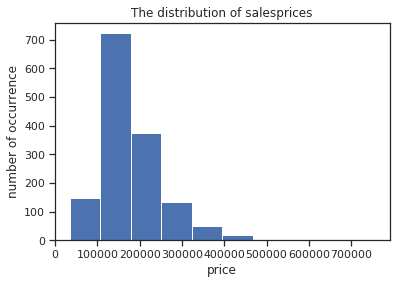

In [0]:
plt.hist(hp2.saleprice)
plt.title("The distribution of salesprices")
plt.xlabel("price")
plt.ylabel("number of occurrence")
plt.show()

In [0]:
len(list(hp2))

75

In [0]:
#list(zip(list(hp2.nunique()),list(hp2)))

In [0]:
#hp2['lotshape']

type(hp2['lotfrontage'][0])

fill_list=list(hp2)

for col in fill_list:
  if type(col[0])!=str:
    hp2[col]=hp2.apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [0]:
#hp2.info()

In [0]:
hp2['poolarea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: poolarea, dtype: int64

In [0]:
hp2['screenporch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: screenporch, Length: 76, dtype: int64

In [0]:
hp2['threessnporch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: threessnporch, dtype: int64

In [0]:
hp2['openporchsf'].value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: openporchsf, Length: 202, dtype: int64

In [0]:
hp2['enclosedporch'].value_counts()

0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: enclosedporch, Length: 120, dtype: int64

In [0]:
hp2['bsmtfinsf2'].value_counts()

0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: bsmtfinsf2, Length: 144, dtype: int64

In [0]:
hp2['lowqualfinsf'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: lowqualfinsf, dtype: int64

In [0]:
hp2['secondflrsf'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: secondflrsf, Length: 417, dtype: int64

In [0]:
hp2['wooddecksf'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: wooddecksf, Length: 274, dtype: int64

ALL THESE COLUMNS ARE MOSTLY ZEROES SO I WILL DROP


In [0]:
hp2=hp2.drop(columns=['secondflrsf','lowqualfinsf','bsmtfinsf2','enclosedporch','openporchsf','threessnporch','screenporch','poolarea','wooddecksf'])

In [13]:
hp2.head(3)

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,9,2008,WD,Normal,223500


In [0]:
#hp3.info()

WILL CHECK THE 6 CONTINUOUS COLUMNS FOR OUTLIERS

In [0]:
hp2_continue=hp2[['lotarea','masvnrarea','bsmtfinsf1','firstflrsf','grlivarea','garagearea']]

In [15]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


In [16]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp2_continue))
z1=(z>1)
z2=(z>2)
print(z)

[[0.20714171        nan 0.57542484 0.79343379 0.37033344 0.35100032]
 [0.09188637        nan 1.17199212 0.25714043 0.48251191 0.06073101]
 [0.07347998        nan 0.09290718 0.62782603 0.51501256 0.63172623]
 ...
 [0.14781027        nan 0.36987111 0.06565646 1.56964722 1.03391416]
 [0.08016039        nan 0.86554834 0.21898188 0.83278768 1.09005935]
 [0.05811155        nan 0.84738933 0.2416147  0.49393395 0.9216238 ]]


In [17]:
z1

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])

**SOME VALUES GREATER THAN ONE STD AWAY**



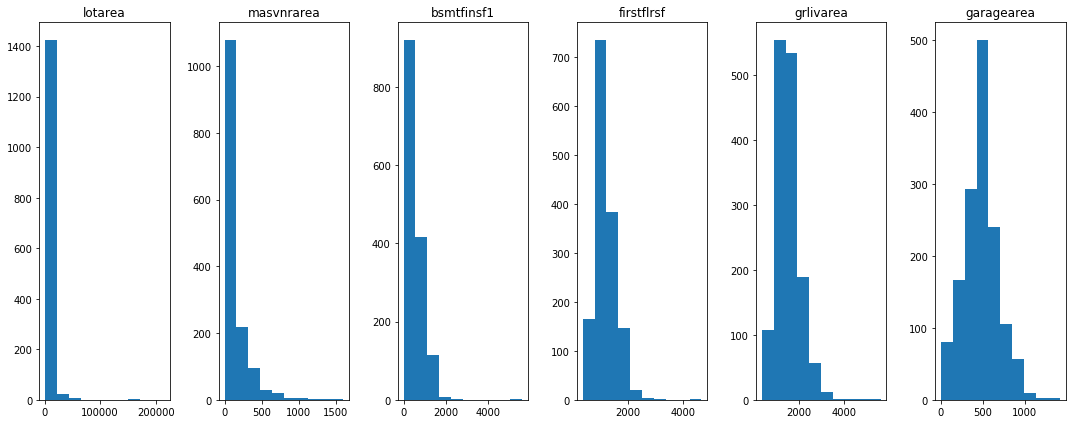

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(1,6,1)
plt.hist(hp2['lotarea'])
plt.title('lotarea')

plt.subplot(1,6,2)
plt.hist(hp2['masvnrarea'])
plt.title('masvnrarea')

plt.subplot(1,6,3)
plt.hist(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')

plt.subplot(1,6,4)
plt.hist(hp2['firstflrsf'])
plt.title('firstflrsf')

plt.subplot(1,6,5)
plt.hist(hp2['grlivarea'])
plt.title('grlivarea')

plt.subplot(1,6,6)
plt.hist(hp2['garagearea'])
plt.title('garagearea')

plt.tight_layout()


///////////////////////////////////////////////////////////////////////

  **BREAK**

**INTERPOLATE**???

**ARE THERE ANY NaN LEFT??????????**

fill_list=list(hp2_continue)

for col in fill_list:
  
    hp2_continue[col]=hp2_continue.apply(lambda x: x.fillna(x.interpolate(limit_direction='both')))

In [19]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


Text(0.5, 1.0, 'lotarea')

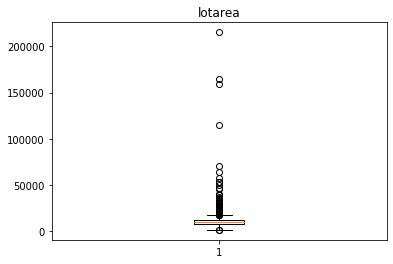

In [20]:
plt.boxplot(hp2['lotarea'])
plt.title('lotarea')

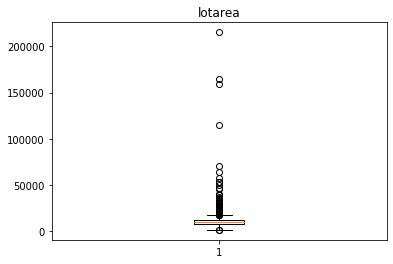

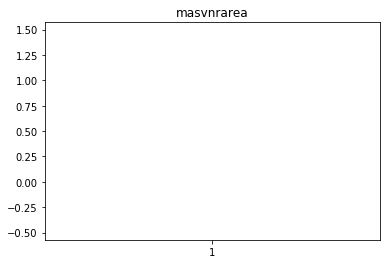

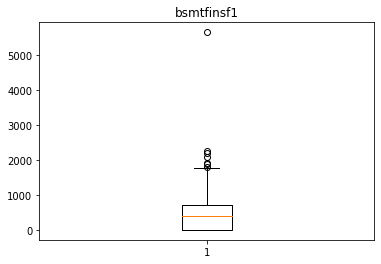

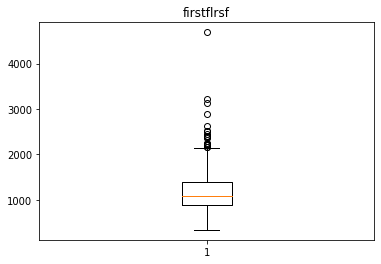

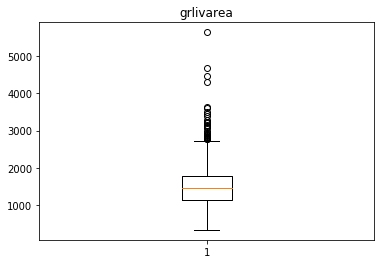

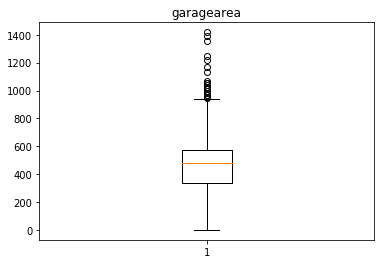

In [21]:

#
#plt.subplots_adjust(right=2,top=2,bottom=.2,wspace=.2)

plt.boxplot(hp2['lotarea'])
plt.title('lotarea')
plt.show()

plt.boxplot(hp2['masvnrarea'])
plt.title('masvnrarea')
plt.show()


plt.boxplot(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')
plt.show()


plt.boxplot(hp2['firstflrsf'])
plt.title('firstflrsf')
plt.show()


plt.boxplot(hp2['grlivarea'])
plt.title('grlivarea')
plt.show()


plt.boxplot(hp2['garagearea'])
plt.title('garagearea')
plt.show()

**Winsorize**

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
hp2['lotarea'] = winsorize(hp2["lotarea"], (.05,.15))
hp2['masvnrarea'] = winsorize(hp2["masvnrarea"], (.05,.15))
hp2['bsmtfinsf1'] = winsorize(hp2["bsmtfinsf1"], (.05,.15))
hp2['firstflrsf'] = winsorize(hp2["firstflrsf"], (.05,.15))
hp2['grlivarea'] = winsorize(hp2["grlivarea"], (.05,.15))
hp2['garagearea'] = winsorize(hp2["garagearea"], (.05,.15))


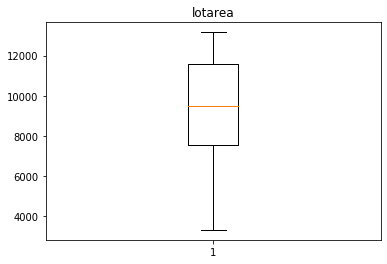

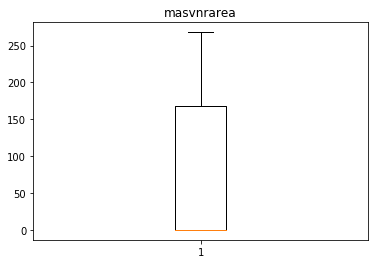

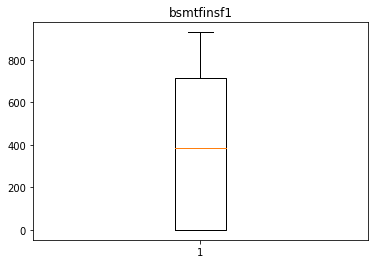

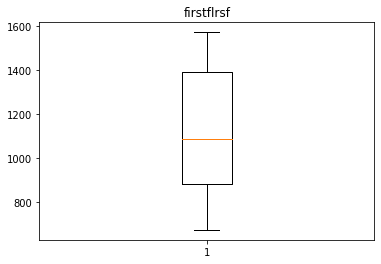

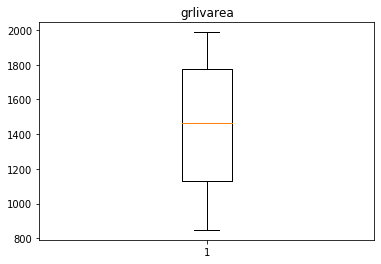

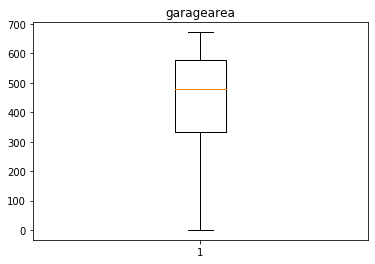

In [24]:

#
#plt.subplots_adjust(right=2,top=2,bottom=.2,wspace=.2)

plt.boxplot(hp2['lotarea'])
plt.title('lotarea')
plt.show()

plt.boxplot(hp2['masvnrarea'])
plt.title('masvnrarea')
plt.show()


plt.boxplot(hp2['bsmtfinsf1'])
plt.title('bsmtfinsf1')
plt.show()


plt.boxplot(hp2['firstflrsf'])
plt.title('firstflrsf')
plt.show()


plt.boxplot(hp2['grlivarea'])
plt.title('grlivarea')
plt.show()


plt.boxplot(hp2['garagearea'])
plt.title('garagearea')
plt.show()

In [25]:
hp2_continue.head()

,lotarea,masvnrarea,bsmtfinsf1,firstflrsf,grlivarea,garagearea
0,8450,196.0,706,856,1710,548
1,9600,0.0,978,1262,1262,460
2,11250,162.0,486,920,1786,608
3,9550,0.0,216,961,1717,642
4,14260,350.0,655,1145,2198,836


In [26]:
hp2.corr()

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.012285,-0.028365,0.012609,-0.012713,-0.021998,-0.038924,-0.006426,-0.007940,-0.015415,-0.001139,0.002926,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.006044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.429869,0.032628,-0.059316,0.027850,0.040581,0.012766,-0.059626,-0.140759,-0.238518,-0.244109,0.080508,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.084379,-0.007683,-0.013585,-0.021407,-0.084284
lotarea,-0.012285,-0.429869,1.000000,0.229869,-0.025978,0.086753,0.062612,0.163824,0.163515,0.103879,0.343105,0.420682,0.418924,0.099651,0.035291,0.213072,0.118747,0.320669,-0.014003,0.407534,0.329459,0.030610,0.316552,0.338077,0.054144,0.006731,-0.021229,0.426361
overallqual,-0.028365,0.032628,0.229869,1.000000,-0.091932,0.572323,0.550684,0.416103,0.152898,0.308159,0.537808,0.442950,0.594700,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.543217,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.025978,-0.091932,1.000000,-0.375983,0.073741,-0.144902,-0.013687,-0.136841,-0.171098,-0.156311,-0.121317,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.145210,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.086753,0.572323,-0.375983,1.000000,0.592855,0.372380,0.229225,0.149040,0.391452,0.292137,0.247029,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.502206,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.062612,0.550684,0.073741,0.592855,1.000000,0.197437,0.087622,0.181133,0.291066,0.242616,0.313616,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.372703,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.038924,0.012766,0.163824,0.416103,-0.144902,0.372380,0.197437,1.000000,0.232184,0.112479,0.352912,0.332710,0.334214,0.112114,0.032065,0.275900,0.192912,0.117611,-0.041757,0.266179,0.244064,0.286958,0.386439,0.346489,-0.036905,0.022677,0.002301,0.432104
bsmtfinsf1,-0.006426,-0.059626,0.163515,0.152898,-0.013687,0.229225,0.087622,0.232184,1.000000,-0.566932,0.379257,0.297502,0.047588,0.663342,0.082207,0.003210,-0.005400,-0.100402,-0.103713,-0.032675,0.202461,0.116916,0.177739,0.235493,0.011214,-0.012252,0.016465,0.302872
bsmtunfsf,-0.007940,-0.140759,0.103879,0.308159,-0.136841,0.149040,0.181133,0.112479,-0.566932,1.000000,0.415360,0.316877,0.262699,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.152180,-0.023837,0.034888,-0.041258,0.214479


for col in fill_list:
  if type(col[0])!=str:
    z = np.abs(stats.zscore(hp2[col]))
 
print(z)

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hp2))
print(z)

STILL 76 FEATURES

**WILL LOOK AT CORRELATION AND DROP FEATURES NEAR ZERO CORRELATION WITH SALEPRICE**

In [0]:
hp2=hp2.drop(columns=['id','mssubclass','overallcond','bsmthalfbath','miscval','yrsold','mosold'])

In [28]:
hp2.corr()

,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice
lotarea,1.000000,0.229869,0.086753,0.062612,0.163824,0.163515,0.103879,0.343105,0.420682,0.418924,0.099651,0.213072,0.118747,0.320669,-0.014003,0.407534,0.329459,0.030610,0.316552,0.338077,0.426361
overallqual,0.229869,1.000000,0.572323,0.550684,0.416103,0.152898,0.308159,0.537808,0.442950,0.594700,0.111098,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.543217,0.790982
yearbuilt,0.086753,0.572323,1.000000,0.592855,0.372380,0.229225,0.149040,0.391452,0.292137,0.247029,0.187599,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.502206,0.522897
yearremodadd,0.062612,0.550684,0.592855,1.000000,0.197437,0.087622,0.181133,0.291066,0.242616,0.313616,0.119470,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.372703,0.507101
masvnrarea,0.163824,0.416103,0.372380,0.197437,1.000000,0.232184,0.112479,0.352912,0.332710,0.334214,0.112114,0.275900,0.192912,0.117611,-0.041757,0.266179,0.244064,0.286958,0.386439,0.346489,0.432104
bsmtfinsf1,0.163515,0.152898,0.229225,0.087622,0.232184,1.000000,-0.566932,0.379257,0.297502,0.047588,0.663342,0.003210,-0.005400,-0.100402,-0.103713,-0.032675,0.202461,0.116916,0.177739,0.235493,0.302872
bsmtunfsf,0.103879,0.308159,0.149040,0.181133,0.112479,-0.566932,1.000000,0.415360,0.316877,0.262699,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.152180,0.214479
totalbsmtsf,0.343105,0.537808,0.391452,0.291066,0.352912,0.379257,0.415360,1.000000,0.735497,0.383660,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.431860,0.613581
firstflrsf,0.420682,0.442950,0.292137,0.242616,0.332710,0.297502,0.316877,0.735497,1.000000,0.480317,0.232756,0.369993,-0.153349,0.128973,0.077031,0.369831,0.388253,0.238469,0.446524,0.461136,0.566380
grlivarea,0.418924,0.594700,0.247029,0.313616,0.334214,0.047588,0.262699,0.383660,0.480317,1.000000,0.008862,0.646363,0.433146,0.509142,0.123886,0.790101,0.462598,0.253831,0.485249,0.443356,0.661299


**NEXT FIND FEATURES HIGHLY CORRELATED WITH EACH OTHER**

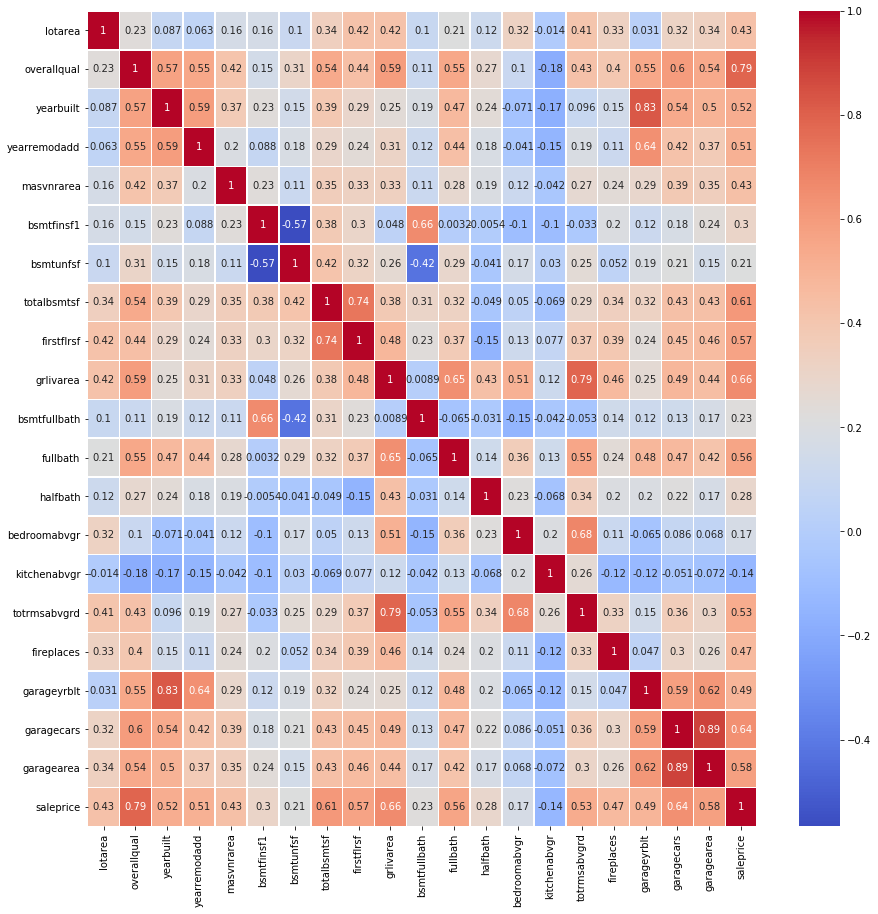

In [29]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

only found yearbuilt | garageyearbuilt--  totalrmsabvgrd  |grlivearea--GARAGCARS|GARAGE AREA

In [0]:
hp2=hp2.drop(columns=['totrmsabvgrd','garageyrblt','garagearea'],axis=1)

In [31]:
hp2.corr()

,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,fireplaces,garagecars,saleprice
lotarea,1.000000,0.229869,0.086753,0.062612,0.163824,0.163515,0.103879,0.343105,0.420682,0.418924,0.099651,0.213072,0.118747,0.320669,-0.014003,0.329459,0.316552,0.426361
overallqual,0.229869,1.000000,0.572323,0.550684,0.416103,0.152898,0.308159,0.537808,0.442950,0.594700,0.111098,0.550600,0.273458,0.101676,-0.183882,0.396765,0.600671,0.790982
yearbuilt,0.086753,0.572323,1.000000,0.592855,0.372380,0.229225,0.149040,0.391452,0.292137,0.247029,0.187599,0.468271,0.242656,-0.070651,-0.174800,0.147716,0.537850,0.522897
yearremodadd,0.062612,0.550684,0.592855,1.000000,0.197437,0.087622,0.181133,0.291066,0.242616,0.313616,0.119470,0.439046,0.183331,-0.040581,-0.149598,0.112581,0.420622,0.507101
masvnrarea,0.163824,0.416103,0.372380,0.197437,1.000000,0.232184,0.112479,0.352912,0.332710,0.334214,0.112114,0.275900,0.192912,0.117611,-0.041757,0.244064,0.386439,0.432104
bsmtfinsf1,0.163515,0.152898,0.229225,0.087622,0.232184,1.000000,-0.566932,0.379257,0.297502,0.047588,0.663342,0.003210,-0.005400,-0.100402,-0.103713,0.202461,0.177739,0.302872
bsmtunfsf,0.103879,0.308159,0.149040,0.181133,0.112479,-0.566932,1.000000,0.415360,0.316877,0.262699,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.051575,0.214175,0.214479
totalbsmtsf,0.343105,0.537808,0.391452,0.291066,0.352912,0.379257,0.415360,1.000000,0.735497,0.383660,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.339519,0.434585,0.613581
firstflrsf,0.420682,0.442950,0.292137,0.242616,0.332710,0.297502,0.316877,0.735497,1.000000,0.480317,0.232756,0.369993,-0.153349,0.128973,0.077031,0.388253,0.446524,0.566380
grlivarea,0.418924,0.594700,0.247029,0.313616,0.334214,0.047588,0.262699,0.383660,0.480317,1.000000,0.008862,0.646363,0.433146,0.509142,0.123886,0.462598,0.485249,0.661299


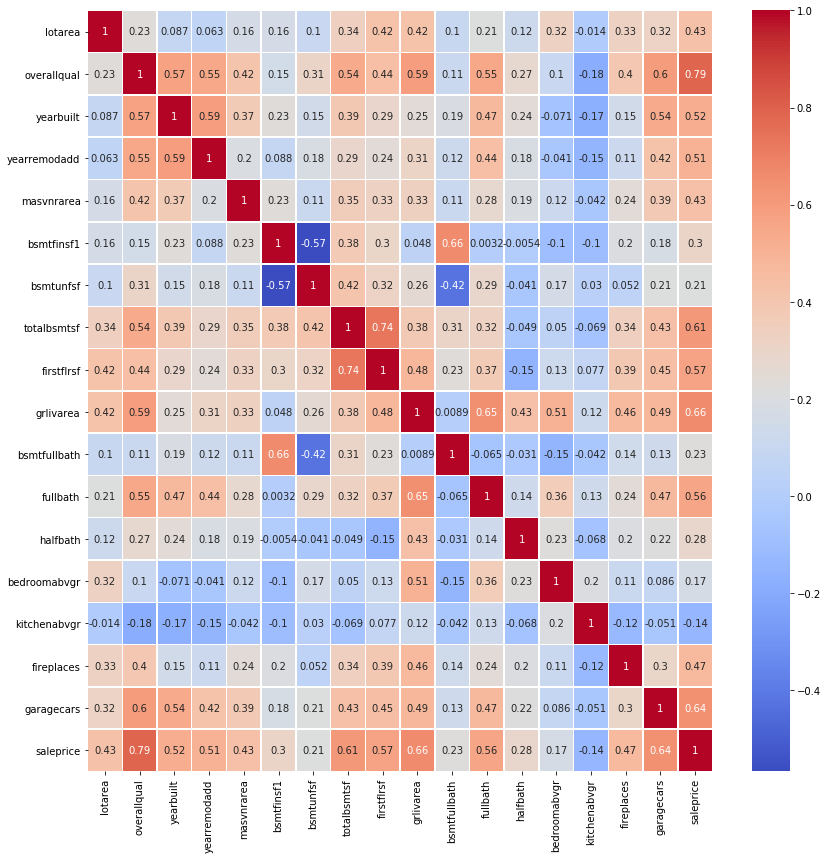

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

A few more highly correlated -- firstflrsf -- totalbassf

In [0]:
hp2=hp2.drop(columns=['totalbsmtsf'],axis=1)

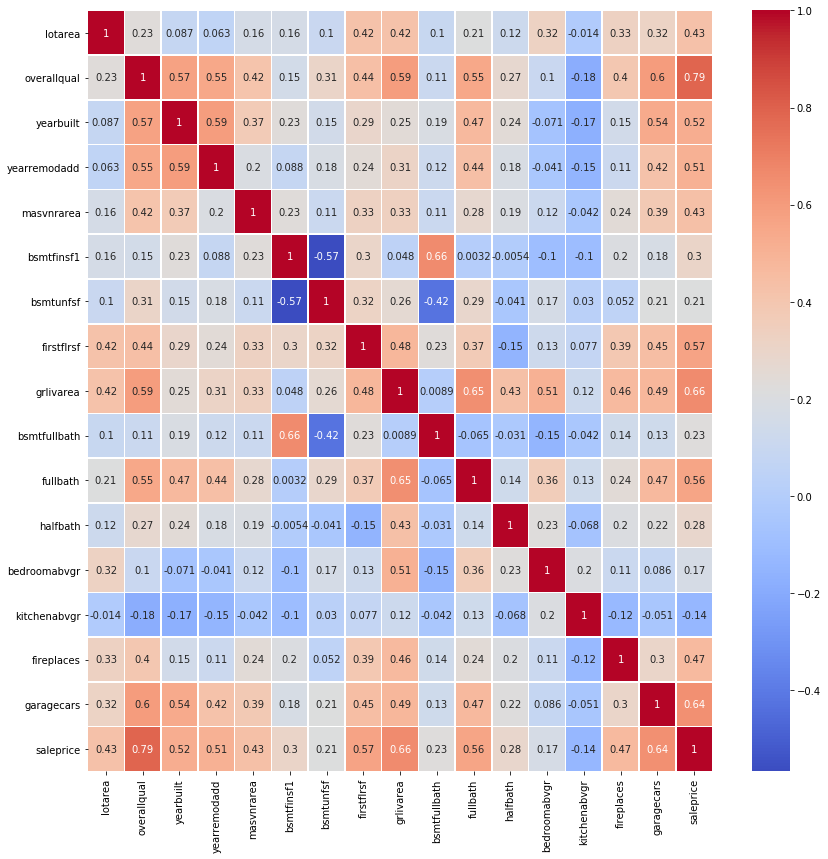

In [34]:
plt.figure(figsize=(14,14))
sns.heatmap(hp2.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

In [35]:
hp2.head(2)

,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,heating,heatingqc,centralair,electrical,firstflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplaces,garagetype,garagefinish,garagecars,garagequal,garagecond,paveddrive,saletype,salecondition,saleprice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,GasA,Ex,Y,SBrkr,856,1710,1,2,1,3,1,Gd,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,929,Unf,284,GasA,Ex,Y,SBrkr,1262,1262,0,2,0,3,1,TA,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal,181500


**Will set cut off at .60**



overallqual, fistflsq,glivarea,garagecars

In [0]:
hp3=hp2[['overallqual','firstflrsf','grlivarea','garagecars','saleprice']]

In [37]:
hp3.head()

,overallqual,firstflrsf,grlivarea,garagecars,saleprice
0,7,856,1710,2,208500
1,6,1262,1262,2,181500
2,7,920,1786,2,223500
3,7,961,1717,3,140000
4,8,1145,1987,3,250000


WILL CHECK LINERAITY OF COEFFICIENTS HERE


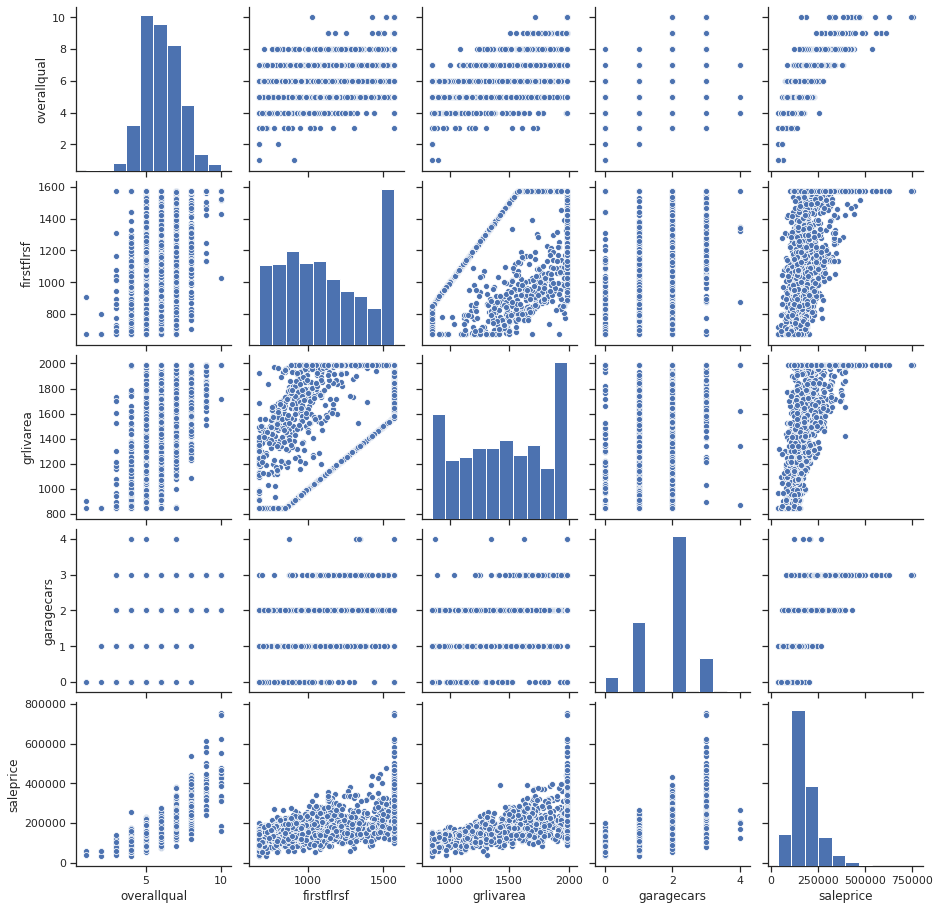

In [38]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
##iris = sns.load_dataset("iris")
g = sns.pairplot(hp3,kind='scatter')

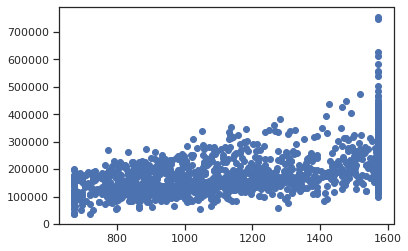

In [39]:
plt.scatter(hp3['firstflrsf'],hp3['saleprice'])

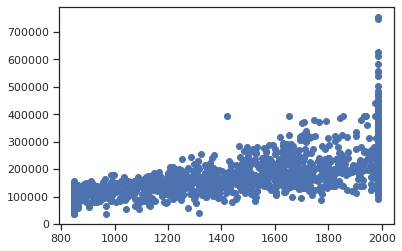

In [40]:
plt.scatter(hp3['grlivarea'],hp3['saleprice'])

In [0]:
target=hp3['saleprice']

In [0]:
hp4=hp3.drop(['saleprice'],axis=1)

**need ONE-HOT**

In [0]:
from sklearn.preprocessing import OneHotEncoder 

In [0]:
df = pd.get_dummies(hp4, columns=['overallqual','garagecars'],drop_first=True)

In [45]:
df.head()

,firstflrsf,grlivarea,overallqual_2,overallqual_3,overallqual_4,overallqual_5,overallqual_6,overallqual_7,overallqual_8,overallqual_9,overallqual_10,garagecars_1,garagecars_2,garagecars_3,garagecars_4
0,856,1710,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1262,1262,0,0,0,0,1,0,0,0,0,0,1,0,0
2,920,1786,0,0,0,0,0,1,0,0,0,0,1,0,0
3,961,1717,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1145,1987,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
X=df

In [0]:
Y=target

In [48]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     349.7
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:20:55   Log-Likelihood:                -17425.
No. Observations:                1460   AIC:                         3.488e+04
Df Residuals:                    1444   BIC:                         3.497e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.102e+04   2.65e+04     -0.793      0.428    -7.3e+04     3.1e+04
firstflrsf        36.9080      4.054      9.105      0.000      28.957      44.859
grlivarea         48.0247      3.461     13.876      0.000      41.236      54.814
overallqual_2  -2906.0325    3.4e+04     -0.085      0.932   -6.96e+04    6.38e+04
overallqual_3   1314.6418   2.77e+04      0.047      0.962    -5.3e+04    5.57e+04
overallqual_4   2.559e+04   2.67e+04      0.958      0.338   -2.68e+04     7.8e+04
overallqual_5   3.815e+04   2.67e+04      1.432      0.152   -1.41e+04    9.04e+04
overallqual_6   5.217e+04   2.67e+04      1.953      0.051    -242.014    1.05e+05
overallqual_7   7.773e+04   2.68e+04      2.900      0.004    2.51e+04     1.3e+05
overallqual_8   1.178e+05    2.7e+04      4.369      0.000    6.49e+04    1.71e+05
overallqual_9   1.878e+05   2.75e+04      6.819      0.000    1.34e+05    2.42e+05
overallqual_10  2.509e+05   2.84e+04      8.835      0.000    1.95e+05    3.07e+05
garagecars_1    1.286e+04   4696.718      2.737      0.006    3644.119    2.21e+04
garagecars_2    2.563e+04   4716.390      5.434      0.000    1.64e+04    3.49e+04
garagecars_3    6.166e+04   6026.473     10.231      0.000    4.98e+04    7.35e+04
garagecars_4     4.21e+04   1.72e+04      2.445      0.015    8330.793    7.59e+04
==============================================================================
Omnibus:                      476.466   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10501.285
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                      15.991   Cond. No.                     1.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#**ASSIGNMENT QUESTION 3**

Load the houseprices data from Thinkful's database.

Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

Now, exclude the insignificant features from your model. Did anything change?

Interpret the statistically significant coefficients by quantifying their relations with the house prices.

 Which features have a more prominent effect on house prices?
 
Do the results sound reasonable to you? If not, try to explain the potential reasons.




iNSIGNIFICANT = OVERALLQUAL_2,_3,_4

In [49]:
list(X)

['const',
 'firstflrsf',
 'grlivarea',
 'overallqual_2',
 'overallqual_3',
 'overallqual_4',
 'overallqual_5',
 'overallqual_6',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
fill_list=[
 'firstflrsf',
 'grlivarea',
 'overallqual_5',
 'overallqual_6',
 'overallqual_7',
 'overallqual_8',
 'overallqual_9',
 'overallqual_10',
 'garagecars_1',
 'garagecars_2',
 'garagecars_3',
 'garagecars_4']

In [0]:
X=df[fill_list]

In [52]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:21:51   Log-Likelihood:                -17430.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1447   BIC:                         3.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -978.1197   6340.337     -0.154      0.877   -1.34e+04    1.15e+04
firstflrsf        37.0705      4.061      9.128      0.000      29.104      45.037
grlivarea         48.2168      3.466     13.911      0.000      41.418      55.016
overallqual_5   1.678e+04   3760.974      4.462      0.000    9405.599    2.42e+04
overallqual_6   3.075e+04   3981.480      7.722      0.000    2.29e+04    3.86e+04
overallqual_7   5.629e+04   4366.424     12.891      0.000    4.77e+04    6.49e+04
overallqual_8   9.646e+04   5205.710     18.530      0.000    8.62e+04    1.07e+05
overallqual_9   1.666e+05   7632.087     21.826      0.000    1.52e+05    1.82e+05
overallqual_10  2.296e+05   1.03e+04     22.333      0.000    2.09e+05     2.5e+05
garagecars_1    1.392e+04   4665.298      2.984      0.003    4771.344    2.31e+04
garagecars_2    2.655e+04   4690.072      5.662      0.000    1.74e+04    3.58e+04
garagecars_3    6.216e+04   6013.822     10.337      0.000    5.04e+04     7.4e+04
garagecars_4    4.464e+04   1.72e+04      2.591      0.010    1.08e+04    7.84e+04
==============================================================================
Omnibus:                      472.733   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10204.935
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      15.804   Cond. No.                     3.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OVERALL QUALITY 9 AND 10 HAVE MOST PROMINENT AFFECT ON PRICE

NOT SURPRISING AT 9 AND 10 ARE THE HIGHEST RATINGS FOR OVERALL QUALLITY

**For each model you try, get the goodness of fit metrics and compare your models with each other**.

 **Which model is the best and why**?

COMPARING THESE TWO MODELS -- MODEL 1 IS BETTER -- HIGHER R^2, LOWER AIC, BIC -- actually very little diff



WILL STANDARIZED FEATURE CHANGE THIS? 2-19-20

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X=X_std

LOOKS LIKE STATS MODEL ALREADY STANDARDIZES

In [56]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:39:24   Log-Likelihood:                -17430.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1447   BIC:                         3.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    973.073    185.928      0.000    1.79e+05    1.83e+05
x1          7.431e-12   1.04e-12      7.172      0.000     5.4e-12    9.46e-12
x2          1.085e+04   1188.124      9.128      0.000    8514.675    1.32e+04
x3          1.808e+04   1299.882     13.911      0.000    1.55e+04    2.06e+04
x4          7467.6219   1673.437      4.462      0.000    4185.000    1.08e+04
x5          1.342e+04   1737.970      7.722      0.000       1e+04    1.68e+04
x6          2.326e+04   1804.310     12.891      0.000    1.97e+04    2.68e+04
x7          3.078e+04   1661.166     18.530      0.000    2.75e+04     3.4e+04
x8          2.816e+04   1290.356     21.826      0.000    2.56e+04    3.07e+04
x9          2.534e+04   1134.645     22.333      0.000    2.31e+04    2.76e+04
x10         6050.6185   2027.459      2.984      0.003    2073.545       1e+04
x11         1.317e+04   2325.513      5.662      0.000    8604.753    1.77e+04
x12         2.049e+04   1981.857     10.337      0.000    1.66e+04    2.44e+04
x13         2607.6846   1006.444      2.591      0.010     633.439    4581.930
==============================================================================
Omnibus:                      472.733   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10204.935
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      15.804   Cond. No.                     4.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


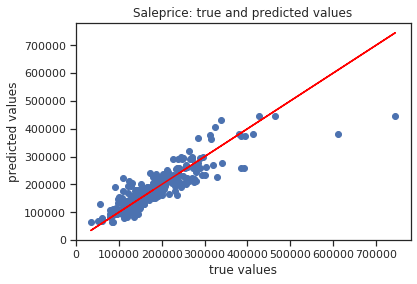

Mean absolute error of the prediction is: 26025.07130978755
Mean squared error of the prediction is: 1581510593.87912
Root mean squared error of the prediction is: 39768.21084583917
Mean absolute percentage error of the prediction is: 15.069383449602142


In [62]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Saleprice: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

###**Create Ridge Regression With Candidate Alpha Values**

In [0]:
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.1,.5,1.0,1.5,1.6,1.7, 10.0])

###**Fit Ridge Regression**

In [0]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, Y)

###**View Best Model’s Alpha Value**

In [80]:
# View alpha
model_cv.alpha_

1.5

In [83]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=1.5) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7884093921699932
-----Test set statistics-----
R-squared of the model on the test set is: 0.7579271670447566
Mean absolute error of the prediction is: 26482.89793321384
Mean squared error of the prediction is: 1625205366.044476
Root mean squared error of the prediction is: 40313.83591329999
Mean absolute percentage error of the prediction is: 15.24328659672153


#**LASSO**

In [85]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))





R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0016183407463286061
Mean absolute error of the prediction is: 58023.64411709514
Mean squared error of the prediction is: 6724569139.943377
Root mean squared error of the prediction is: 82003.47029207592
Mean absolute percentage error of the prediction is: 36.65964810134902


**LET'S PICK A BETTER ALPHA**

In [0]:
from sklearn.linear_model import LassoCV
regr_cv = LassoCV(alphas=[0.1,.5,1.0,1.5,1.6,1.7, 10.0])

In [0]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, Y)

In [88]:
# View alpha
model_cv.alpha_

1.5

In [89]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=1.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))




R-squared of the model on the training set is: 0.7884151252293725
-----Test set statistics-----
R-squared of the model on the test set is: 0.7577901108112122
Mean absolute error of the prediction is: 26502.31134880464
Mean squared error of the prediction is: 1626125521.0386856
Root mean squared error of the prediction is: 40325.24669532334
Mean absolute percentage error of the prediction is: 15.243123493719505


**MUCH BETTER**

#**ElasticNet regression**

In [90]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0016183407463286061
Mean absolute error of the prediction is: 58023.64411709514
Mean squared error of the prediction is: 6724569139.943377
Root mean squared error of the prediction is: 82003.47029207592
Mean absolute percentage error of the prediction is: 36.65964810134902


In [0]:
from sklearn.linear_model import ElasticNetCV
regr_cv = ElasticNetCV(alphas=[0.1,.5,1.0,1.5,1.6,1.7, 10.0])

In [0]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, Y)

In [94]:
# View alpha
model_cv.alpha_

0.1

In [95]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=1, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.734373726014108
-----Test set statistics-----
R-squared of the model on the test set is: 0.7104350476185864
Mean absolute error of the prediction is: 27164.21642303516
Mean squared error of the prediction is: 1944053401.9597962
Root mean squared error of the prediction is: 44091.42095646041
Mean absolute percentage error of the prediction is: 17.28335558018317


###**LASSO IS BEST**